# Fixing Imbalance in Classification Dataset

- Undersapmling -> Randomly remove some samples from the majority class

- Oversampling -> Synthetically some samples from the minority class

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


0 - Non-Diabetes 1 - Diabetes

<Axes: xlabel='Outcome', ylabel='count'>

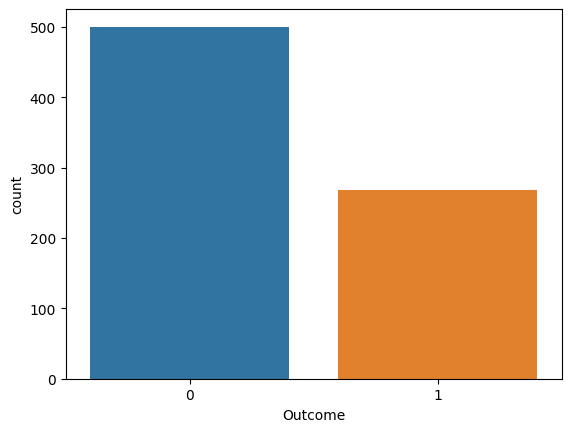

In [5]:
sns.countplot(data = df, x='Outcome')

In [7]:
from imblearn.under_sampling import (
    RepeatedEditedNearestNeighbours, 
    RandomUnderSampler
)

In [8]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
X, y = df.drop('Outcome', axis=1), df['Outcome']
us1 = RandomUnderSampler()
Xr, yr = us1.fit_resample(X, y)
print(X.shape, y.shape)
print("Undersampled Data sizes")
print(Xr.shape, yr.shape)

(768, 8) (768,)
Undersampled Data sizes
(536, 8) (536,)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        52
           1       0.76      0.68      0.72        56

    accuracy                           0.72       108
   macro avg       0.72      0.72      0.72       108
weighted avg       0.73      0.72      0.72       108



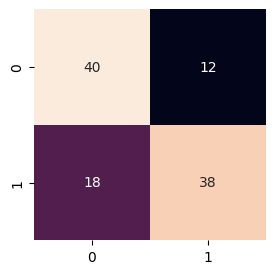

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xr, yr, test_size = 0.2, random_state =0)
model = KNeighborsClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(ytest,ypred), annot=True,ax=ax,cbar=False)
print(classification_report(ytest, ypred))

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
smote = SMOTE()
Xs, ys = smote.fit_resample(X, y)
print(X.shape, y.shape)
print("Oversampled Data Sizes")
print(Xs.shape, ys.shape)

(768, 8) (768,)
Oversampled Data Sizes
(1000, 8) (1000,)


              precision    recall  f1-score   support

           0       0.78      0.67      0.72       105
           1       0.68      0.79      0.73        95

    accuracy                           0.72       200
   macro avg       0.73      0.73      0.72       200
weighted avg       0.73      0.72      0.72       200



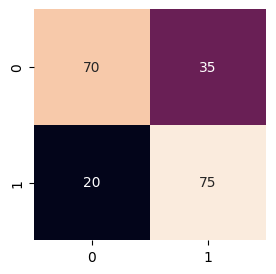

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, ys, test_size=0.2, random_state=0)
model = KNeighborsClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(ytest, ypred), annot=True,ax=ax, cbar=False)
print(classification_report(ytest, ypred))